# Simple convolutional neural network to perform classification.


The project focuses on developing and comparing image classification models using convolutional neural networks (CNNs). First, we build a custom CNN model from scratch, train it on a chosen dataset, and evaluate its performance. Next, we fine-tune two pre-trained state-of-the-art models, such as ResNet or AlexNet, and compare their performance with our custom model.

The goal of this is to understand the trade-offs between designing a CNN from scratch and using pre-trained models through transfer learning. From this we get a chance to explore key concepts like network architecture, activation functions, optimizers, and overfitting, while analyzing how different models handle image classification tasks.

### 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


### 2.Loading the Dataset using ucimlrepo

Found 3803 images belonging to 9 classes.
Found 949 images belonging to 9 classes.


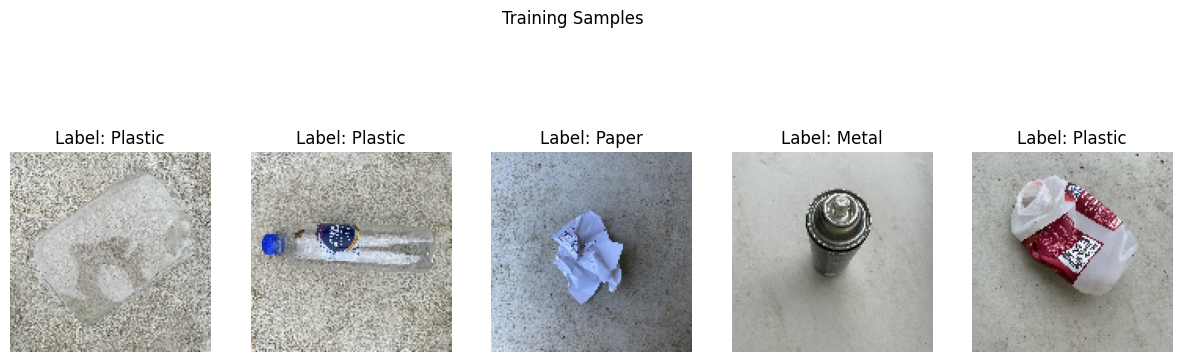

In [3]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the main RealWaste directory
#dataset_path = r'C:\Users\prave\Downloads\realwaste\realwaste-main\RealWaste'
dataset_path = r'C:\Users\STZ\Downloads\realwaste-main\RealWaste'

# Create ImageDataGenerators for training and validation with a split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data with 80% split
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='training'  # Use training split
)

# Load validation data with 20% split
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Use validation split
)

# Get class names from the training data generator
class_names = list(train_data.class_indices.keys())

# Function to plot a few samples with their labels
def plot_samples(data_gen, class_names, num_samples=5):
    images, labels = next(data_gen)  # Fetch a batch of images and labels
    plt.figure(figsize=(15, 5))
    
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {class_names[int(labels[i])]}")
        plt.axis('off')

# Plot training samples
plot_samples(train_data, class_names, num_samples=5)
plt.suptitle('Training Samples')
plt.show()


### 3.Preprocessing the Data

// Import libraries

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

// Define the Sequential model for the RealWaste dataset

model = keras.Sequential([

    // Input layer with input shape matching the size of the resized images (128x128 RGB)
    
    layers.Flatten(input_shape=(128, 128, 3)),  // 128x128 image with 3 color channels (RGB)

    // Fully connected layers with ReLU activation
    
    layers.Dense(256, activation='relu'),
    
    layers.Dense(128, activation='relu'),
    
    layers.Dense(64, activation='relu'),

    // Output layer with units matching the number of classes in the dataset (9 classes)
    
    layers.Dense(9, activation='softmax')
])


// Set learning rate

learning_rate = 0.0005

// Compile the model using Adam optimizer and sparse categorical crossentropy loss

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,

              loss='sparse_categorical_crossentropy',
              
              metrics=['accuracy'])

// Display the model architecture

model.summary()

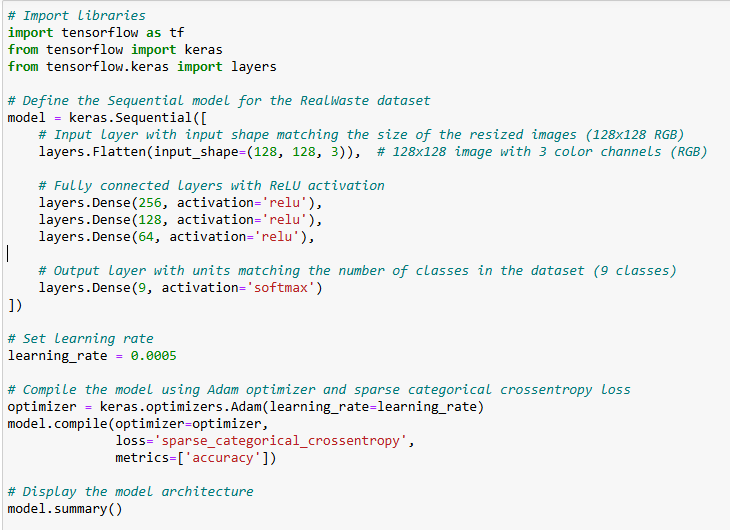

In [5]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the Sequential model for the RealWaste dataset
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape =(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# Set learning rate
learning_rate = 0.0005

# Compile the model using Adam optimizer and sparse categorical crossentropy loss
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,518,345 (24.87 MB)

 Trainable params: 6,518,345 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Adjust the number of epochs based on your dataset size and training time
)


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 53s 433ms/step - accuracy: 0.2373 - loss: 2.0560 - val_accuracy: 0.3109 - val_loss: 1.8119
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 49s 409ms/step - accuracy: 0.4307 - loss: 1.6017 - val_accuracy: 0.4257 - val_loss: 1.6467
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 49s 408ms/step - accuracy: 0.5279 - loss: 1.3871 - val_accuracy: 0.4141 - val_loss: 1.6769
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 47s 395ms/step - accuracy: 0.5853 - loss: 1.2195 - val_accuracy: 0.4668 - val_loss: 1.5810
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 47s 392ms/step - accuracy: 0.6382 - loss: 1.0312 - val_accuracy: 0.4752 - val_loss: 1.6157
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 47s 397ms/step - accuracy: 0.6642 - loss: 0.9438 - val_accuracy: 0.5037 - val_loss: 1.5491
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 47s 397ms/step - accuracy: 0.7070 - loss: 0.8123 - val_accuracy: 0.4932 - val_loss: 1.5008
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 47s 398ms/step - accuracy: 0.7405 - loss: 0